In [1]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import math

from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle


Using TensorFlow backend.


In [2]:
DATA_DIR = Path('.', 'data', 'final', 'public')

In [3]:
train_values = pd.read_csv(DATA_DIR / 'train_values.csv', index_col='building_id')
train_labels = pd.read_csv(DATA_DIR / 'train_labels.csv', index_col='building_id')

In [4]:
#print(train_values.dtypes)
s = (train_values.dtypes == 'object')
object_cols = list(s[s].index)
s = (train_values.dtypes != 'object')
number_cols = list(s[s].index)


In [5]:
test_values = pd.read_csv(DATA_DIR / 'test_values.csv', index_col='building_id')


In [6]:
sns_data=train_values[number_cols].join(train_labels)
sns_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,0,3


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


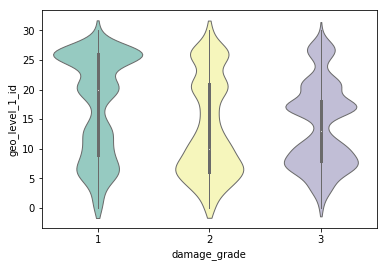

In [7]:
geo_data=sns_data[['geo_level_1_id','damage_grade']]
geo_data['dummy']=1
tmp=geo_data.groupby(['geo_level_1_id','damage_grade'],axis=0).sum()
sns.violinplot(y=sns_data['geo_level_1_id'],x=sns_data['damage_grade'], palette="Set3", bw=.2, cut=1, linewidth=1)

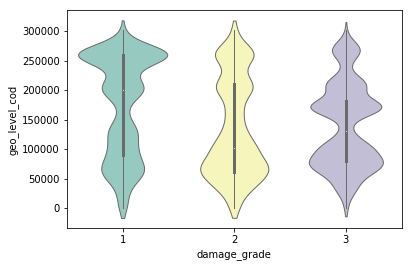

In [8]:
sns_data=train_values.join(train_labels)
geo_level_1_fact=math.pow(10,int(math.log(sns_data['geo_level_2_id'].max(),10)+1))
sns_data['geo_level_n']= sns_data['geo_level_1_id']*geo_level_1_fact+sns_data['geo_level_2_id']
sns_data['geo_level']=sns_data['geo_level_n']#.astype(np.int64).astype(str)
sns_data['geo_level_cod']=sns_data['geo_level_n'].astype(np.int64)
sns.violinplot(y=sns_data['geo_level_cod'],x=sns_data['damage_grade'], palette="Set3", bw=.2, cut=1, linewidth=1)

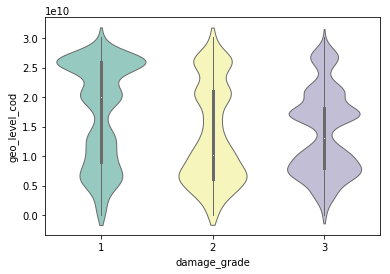

In [9]:
sns_data=train_values.join(train_labels)
geo_level_1_fact=math.pow(10,int(math.log(sns_data['geo_level_2_id'].max(),10)+1))
geo_level_2_fact=math.pow(10,int(math.log(sns_data['geo_level_3_id'].max(),10)+1))
sns_data['geo_level_n']= sns_data['geo_level_1_id']*geo_level_1_fact*geo_level_2_fact+sns_data['geo_level_2_id']*geo_level_2_fact+sns_data['geo_level_3_id']
sns_data['geo_level']=sns_data['geo_level_n']#.astype(np.int64).astype(str)
sns_data['geo_level_2']=sns_data['geo_level_n']*sns_data['geo_level_n']
sns_data['geo_level_cod']=sns_data['geo_level_n'].astype(np.int64)
sns.violinplot(y=sns_data['geo_level_cod'],x=sns_data['damage_grade'], palette="Set3", bw=.2, cut=1, linewidth=1)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


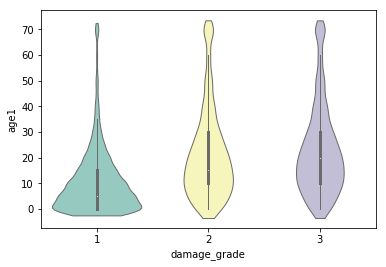

In [10]:
sns_data['age1']=sns_data['age'].apply(lambda x:x  if x <70 else 70)
geo_data=sns_data[['age1','damage_grade']]
geo_data['dummy']=1
tmp=geo_data.groupby(['age1','damage_grade'],axis=0).sum()

sns.violinplot(y=sns_data['age1'],x=sns_data['damage_grade'], palette="Set3", bw=.2, cut=1, linewidth=1)

HAY QUE PROBAR CON CORTES DE EDAD

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


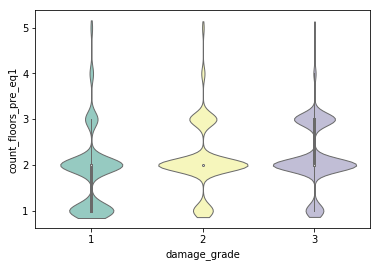

In [13]:
sns_data['count_floors_pre_eq1']=sns_data['count_floors_pre_eq'].apply(lambda x:x  if x <5 else 5)
geo_data=sns_data[['count_floors_pre_eq1','damage_grade']]
geo_data['dummy']=1
tmp=geo_data.groupby(['count_floors_pre_eq1','damage_grade'],axis=0).sum()

sns.violinplot(y=sns_data['count_floors_pre_eq1'],x=sns_data['damage_grade'], palette="Set3", bw=.2, cut=1, linewidth=1)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


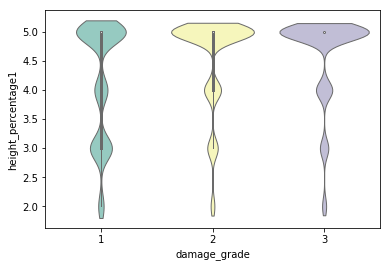

In [14]:
sns_data['height_percentage1']=sns_data['height_percentage'].apply(lambda x:x  if x <5 else 5)
geo_data=sns_data[['height_percentage1','damage_grade']]
geo_data['dummy']=1
tmp=geo_data.groupby(['height_percentage1','damage_grade'],axis=0).sum()

sns.violinplot(y=sns_data['height_percentage1'],x=sns_data['damage_grade'], palette="Set3", bw=.2, cut=1, linewidth=1)